### Install and Import libraries 

In [1]:
pip install Keras-Preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install attention

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.0.5
    Uninstalling keras-3.0.5:
      Successfully uninstalled keras-3.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install rouge_score

  Preparing metadata (setup.py) ... - done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24934 sha256=a2c367bf06c9568ca4683dd9c70fa40ec6513015a62874a9c1f1e9e4f4daa161
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re           
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from string import punctuation
punctuation = list(punctuation)
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from bs4 import BeautifulSoup
import tensorflow as tf
import keras
from keras_preprocessing.text import Tokenizer 
from keras_preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional, GRU, Attention
from keras.models import Model
from keras.callbacks import EarlyStopping
import warnings
import os
warnings.filterwarnings("ignore")

2024-09-29 17:53:02.192040: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-29 17:53:02.192159: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-29 17:53:02.325175: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


### Read data and preparing it

In [6]:
df_train = pd.read_csv('/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/train.csv')
df_valid = pd.read_csv('/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/validation.csv')
df_test  = pd.read_csv('/kaggle/input/newspaper-text-summarization-cnn-dailymail/cnn_dailymail/test.csv')

In [7]:
df_train

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...,...
287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelse...,Chelsea Clinton said question of running for o...
287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ..."
287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...
287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...",A swarm of more than one million has crossed b...


In [8]:
df_train.drop_duplicates(subset=['article'],inplace=True)  #dropping duplicates
df_train.dropna(axis=0,inplace=True)   #dropping na

In [9]:
df_train.reset_index(inplace=True)

In [10]:
df_train

,index,id,article,highlights
0,0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...
...,...,...,...,...
284000,287108,fffdfb56fdf1a12d364562cc2b9b1d4de7481dee,By . James Rush . Former first daughter Chelse...,Chelsea Clinton said question of running for o...
284001,287109,fffeecb8690b85de8c3faed80adbc7a978f9ae2a,An apologetic Vanilla Ice has given his first ...,"Vanilla Ice, 47 - real name Robert Van Winkle ..."
284002,287110,ffff5231e4c71544bc6c97015cdb16c60e42b3f4,America's most lethal sniper claimed he wished...,America's most lethal sniper made comment in i...
284003,287111,ffff924b14a8d82058b6c1c5368ff1113c1632af,"By . Sara Malm . PUBLISHED: . 12:19 EST, 8 Mar...",A swarm of more than one million has crossed b...


**Using this function for cleaning our data**

In [11]:
def clean_text(text):
    # Remove links
    text = re.sub(r'http\S+', '', text)
    
    # Remove all the special characters
    text = re.sub(r'\W', ' ', str(text))

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    # Remove single characters from the start
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 
    
    # Modify the form of some words
    replace_list = {r"'m": ' am',
                    r"'re": ' are',
                    r"let’s": 'let us',
                    r"'s":  ' is',
                    r"'ve": ' have',
                    r"can't": 'can not',
                    r"cannot": 'can not',
                    r"shan’t": 'shall not',
                    r"n't": ' not',
                    r"'d": ' would',
                    r"'ll": ' will',
                    r"'scuse": 'excuse',
                    ',': ' ,',
                    '.': ' .',
                    '!': ' !',
                    '?': ' ?',
                    '\s+': ' '}
    text = text.lower()
    for s in replace_list:
        text = text.replace(s, replace_list[s])
    text = ' '.join(text.split())
    
    # Tokenizer, Lemmatization and removing stop_words
    text = word_tokenize(text)
    text = [lemmatizer.lemmatize(word, pos='v') for word in text if word not in stop_words and word not in punctuation]

    text = ' '.join(text)
        
    return text

In [12]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [13]:
articles = df_train['article'].apply(lambda p: clean_text(p))
summerized = df_train['highlights'].apply(lambda p: clean_text(p))

articles = np.array(articles)
summerized = np.array(summerized)

In [14]:
zip_data =  list(zip(articles, summerized))
lines = pd.DataFrame(zip_data, columns = ['Text' , 'Summarization']) 
lines.head()

,Text,Summarization
0,associate press publish 14 11 est 25 october 2...,bishop john folda north dakota take time diagn...
1,cnn ralph mata internal affairs lieutenant mia...,criminal complaint cop use role help cocaine t...
2,drink driver kill young woman head crash check...,craig eccleston todd 27 drink least three pint...
3,cnn breezy sweep pen president vladimir putin ...,nina do santos say europe must ready accept sa...
4,fleetwood team still 100 record sky bet league...,fleetwood top league one 2 0 win scunthorpe pe...


In [15]:
lines['Summarization'] = lines['Summarization'].apply(lambda x : '<sos> '+ x + ' <eos>')

In [16]:
lines.head()

,Text,Summarization
0,associate press publish 14 11 est 25 october 2...,<sos> bishop john folda north dakota take time...
1,cnn ralph mata internal affairs lieutenant mia...,<sos> criminal complaint cop use role help coc...
2,drink driver kill young woman head crash check...,<sos> craig eccleston todd 27 drink least thre...
3,cnn breezy sweep pen president vladimir putin ...,<sos> nina do santos say europe must ready acc...
4,fleetwood team still 100 record sky bet league...,<sos> fleetwood top league one 2 0 win scuntho...


**Validation data**

In [17]:
articles_valid = df_valid['article'].apply(lambda p: clean_text(p))
summerized_valid = df_valid['highlights'].apply(lambda p: clean_text(p))

articles_valid = np.array(articles_valid)
summerized_valid = np.array(summerized_valid)

In [18]:
zip_data_valid =  list(zip(articles_valid, summerized_valid))
lines_valid = pd.DataFrame(zip_data_valid, columns = ['Text', 'Summarization'])
lines_valid.head()

,Text,Summarization
0,sally forrest actress dancer grace silver scre...,sally forrest actress dancer grace silver scre...
1,middle school teacher china ink hundreds sketc...,work include picture presidential palace yangt...
2,man convict kill father sister former girlfrie...,iftekhar murtaza 29 convict year ago kill ex g...
3,avid rugby fan prince harry could barely watch...,prince harry attendance england crunch match f...
4,triple radio producer inundate message prospec...,nick slater colleagues upload picture facebook...


In [19]:
lines_valid['Summarization'] = lines_valid['Summarization'].apply(lambda x : '<sos> '+ x + ' <eos>')

In [20]:
lines_valid.head()

,Text,Summarization
0,sally forrest actress dancer grace silver scre...,<sos> sally forrest actress dancer grace silve...
1,middle school teacher china ink hundreds sketc...,<sos> work include picture presidential palace...
2,man convict kill father sister former girlfrie...,<sos> iftekhar murtaza 29 convict year ago kil...
3,avid rugby fan prince harry could barely watch...,<sos> prince harry attendance england crunch m...
4,triple radio producer inundate message prospec...,<sos> nick slater colleagues upload picture fa...


**Test data**

In [21]:
df_test = df_test.sample(frac=0.2).reset_index(drop=True)

In [22]:
articles_test = df_test['article'].apply(lambda p: clean_text(p))
summerized_test = df_test['highlights'].apply(lambda p: clean_text(p))

articles_test = np.array(articles_test)
summerized_test = np.array(summerized_test)

In [23]:
zip_data_test =  list(zip(articles_test, summerized_test))
lines_test = pd.DataFrame(zip_data_test, columns = ['Text', 'Summarization']) 
lines_test.head()

,Text,Summarization
0,stun researchers find one uk important manuscr...,black book carmarthen earliest survive welsh m...
1,state education minister adrian piccoli call s...,pilot program allow students one sydney presti...
2,cnn 22 months ago body odin lloyd find industr...,jury find ex new england patriots star guilty ...
3,cnn pardon us lose fan april 8 day yes know si...,april 8 huge lose empire record fan april 14 a...
4,incredible shots american southwest photograph...,kevin russ hop train dumpster dive leftovers s...


In [24]:
lines_test['Summarization'] = lines_test['Summarization'].apply(lambda x : '<sos> '+ x + ' <eos>')

In [25]:
lines_test.head()

,Text,Summarization
0,stun researchers find one uk important manuscr...,<sos> black book carmarthen earliest survive w...
1,state education minister adrian piccoli call s...,<sos> pilot program allow students one sydney ...
2,cnn 22 months ago body odin lloyd find industr...,<sos> jury find ex new england patriots star g...
3,cnn pardon us lose fan april 8 day yes know si...,<sos> april 8 huge lose empire record fan apri...
4,incredible shots american southwest photograph...,<sos> kevin russ hop train dumpster dive lefto...


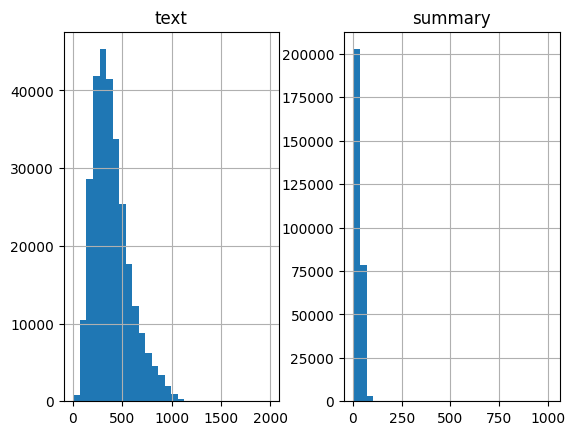

In [26]:
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
#for i in lines['Text']:
#      text_word_count.append(len(i.split()))
text_word_count = [len(i.split()) for i in lines['Text']]

#for i in lines['Summarization']:
#      summary_word_count.append(len(i.split()))
summary_word_count = [len(i.split()) for i in lines['Summarization']]

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 30)
plt.show()

**Check the best maximum length of text**

In [27]:
cnt_t, cnt_s = 0, 0
cnt_t = sum(1 for line in lines['Text'] if len(line.split()) <= 800)
cnt_s = sum(1 for line in lines['Summarization'] if len(line.split()) <= 55)
print(cnt_t/len(lines['Text']), cnt_s/len(lines['Summarization']))

0.9599549303709441 0.9504656608158307


**Splitting data for training and validation**

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(lines['Text'], lines['Summarization'], 
                                                      test_size=0.2, random_state=0, shuffle=True)

In [29]:
X_test = lines_test['Text']
y_test = lines_test['Summarization']

In [30]:
max_len_text=800
max_len_summary=55

**This code is useful for understanding the distribution of words in a dataset and determining how many rare words there are and their impact on the overall text**

In [31]:
X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))

thresh = 6
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in X_tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value

In [32]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
text_max_features = total_count - count
print('Text Vocab: ', text_max_features)

% of rare words in vocabulary:  67.94105244684508
Total Coverage of rare words:  0.5699442627092717
Text Vocab:  131526


In [33]:
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_train))

thresh = 4
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in y_tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value

In [34]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
summary_max_features = total_count-count
print('Summary Vocab: ', summary_max_features)

% of rare words in vocabulary:  63.39327526458744
Total Coverage of rare words:  1.5552235190446175
Summary Vocab:  46902


**preparing text data for input into a machine learning or deep learning model. It uses Tokenizer and pad_sequences methods to convert text into numerical representations that can be fed into a model**

In [35]:
#prepare a tokenizer for reviews on training data
x_tokenizer = Tokenizer(text_max_features)
x_tokenizer.fit_on_texts(list(X_train))

#convert text sequences into integer sequences
X_train    =   x_tokenizer.texts_to_sequences(X_train) 
X_valid   =   x_tokenizer.texts_to_sequences(X_valid)

#padding zero upto maximum length
X_train    =   pad_sequences(X_train,  maxlen=max_len_text, padding='post') 
X_valid   =   pad_sequences(X_valid, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) + 1

In [36]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer(summary_max_features)
y_tokenizer.fit_on_texts(list(y_train))

#convert summary sequences into integer sequences
y_train   =   y_tokenizer.texts_to_sequences(y_train) 
y_valid   =   y_tokenizer.texts_to_sequences(y_valid) 

#padding zero upto maximum length
y_train   =   pad_sequences(y_train, maxlen=max_len_summary, padding='post')
y_valid   =   pad_sequences(y_valid, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) + 1

In [37]:
embeding_index = {}
embed_dim = 300
with open('/kaggle/input/glove-embeddings/glove.6B.300d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float16')
        embeding_index[word] = coefs

In [38]:
x_embed = np.zeros((x_voc_size, embed_dim))
for word, i in x_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < x_voc_size and vec is not None:
        x_embed[i] = vec

In [39]:
y_embed = np.zeros((y_voc_size, embed_dim))
for word, i in y_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < y_voc_size and vec is not None:
        y_embed[i] = vec

#### Building the keras model

In [40]:
from keras import backend as K 
import tensorflow as tf
K.clear_session() 
latent_dim = 128 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, embed_dim, weights=[x_embed], trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = Bidirectional(LSTM(latent_dim, return_sequences=True, return_state=True)) 
encoder_output1, state_h1_f, state_c1_f , state_h1_b, state_c1_b = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = Bidirectional(LSTM(latent_dim,return_sequences=True,return_state=True))
encoder_output2, state_h2_f, state_c2_f, state_h2_b, state_c2_b = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3 = Bidirectional(LSTM(latent_dim, return_state=True, return_sequences=True)) 
encoder_outputs, state_h_f, state_c_f, state_h_b, state_c_b = encoder_lstm3(encoder_output2) 
state_h=Concatenate()([state_h1_f,state_h1_b])
state_c=Concatenate()([state_c1_f,state_c1_b])

# Set up the decoder.
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, embed_dim, weights=[y_embed],trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = Bidirectional(LSTM(latent_dim, return_sequences=True, return_state=True))
decoder_outputs,stated_h1_f, stated_c1_f , stated_h1_b, stated_c1_b = decoder_lstm(dec_emb,initial_state=[state_h_f, state_c_f, state_h_b, state_c_b])

#decoder_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
#decoder_outputs, stated_h, stated_c = decoder_lstm(dec_emb,initial_state=[state_h, state_c])
stated_h=Concatenate()([stated_h1_f,stated_h1_b])
stated_c=Concatenate()([stated_c1_f,stated_c1_b])

#Attention Layer
attention_layer = tf.keras.layers.MultiHeadAttention(num_heads=16, key_dim=128)
attention_outputs = attention_layer(decoder_outputs, encoder_outputs, encoder_outputs)

# Concat attention output and decoder LSTM output
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attention_outputs])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 800)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 800, 300)             1230792   ['input_1[0][0]']             
                                                          00                                      
                                                                                                  
 bidirectional (Bidirection  [(None, 800, 256),           439296    ['embedding[0][0]']           
 al)                          (None, 128),                                                        
                              (None, 128),                                                    

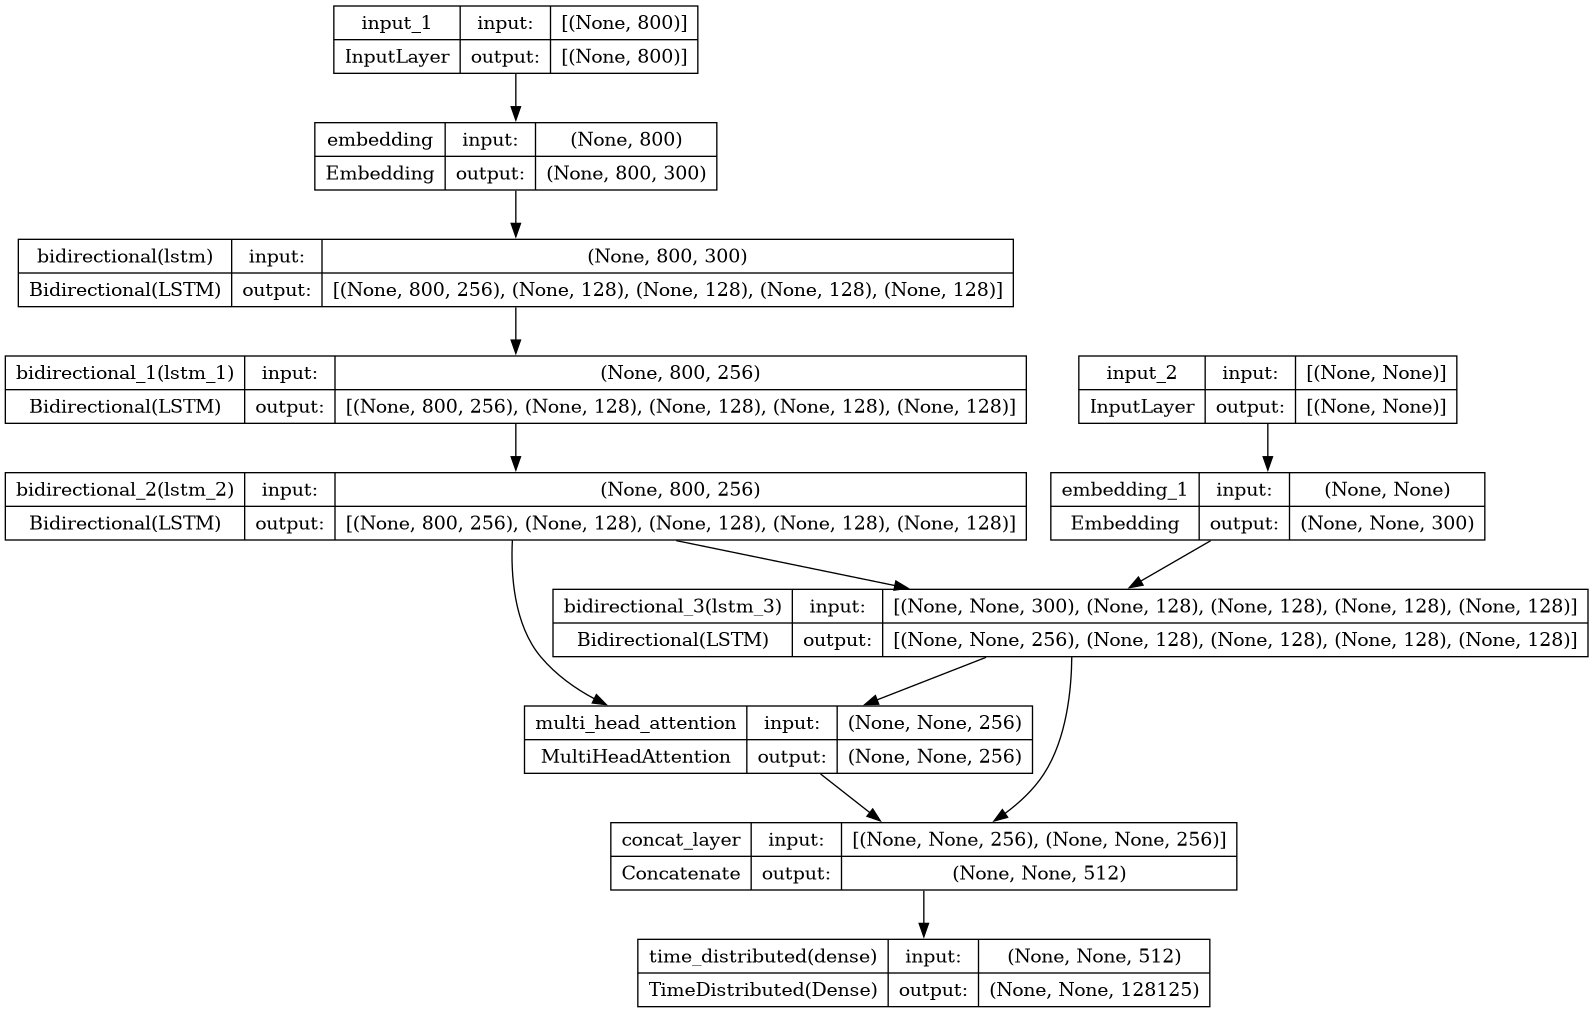

In [41]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [43]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [44]:
history = model.fit([X_train, y_train[:,:-1]], y_train.reshape(y_train.shape[0],y_train.shape[1], 1)[:,1:],
                   epochs=2, callbacks=[es], batch_size=64, verbose=1,
                   validation_data=([X_valid, y_valid[:,:-1]], y_valid.reshape(y_valid.shape[0],y_valid.shape[1], 1)[:,1:]))

Epoch 1/2


I0000 00:00:1727635421.682371     103 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3551/3551 [==============================] - 4374s 1s/step - loss: 3.2064 - accuracy: 0.5501 - val_loss: 1.5410 - val_accuracy: 0.7398
Epoch 2/2
3551/3551 [==============================] - 4247s 1s/step - loss: 0.6177 - accuracy: 0.8994 - val_loss: 0.2911 - val_accuracy: 0.9509


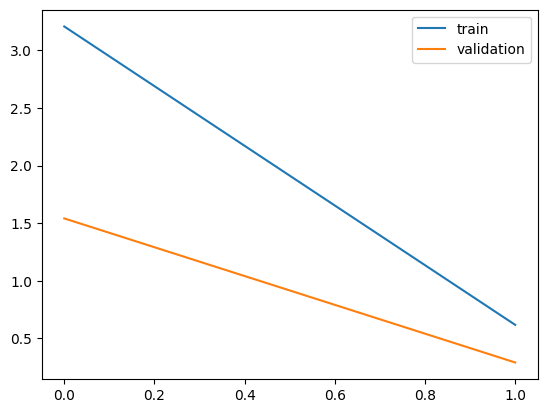

In [45]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.legend()
pyplot.show()

#### inference model for a seq2seq model 

In [46]:
enc_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h_f, state_c_f, state_h_b, state_c_b])

# Define the decoder inputs for inference (hidden states and cell states from the encoder)
decoder_state_input_h   = Input(shape=(latent_dim,))
decoder_state_input_c   = Input(shape=(latent_dim,))
decoder_state_input_h_b = Input(shape=(latent_dim,))
decoder_state_input_c_b = Input(shape=(latent_dim,))

encoder_output_input = Input(shape=(max_len_text, latent_dim*2))

# Get the embeddings of the decoder sequence
dec_emb2 = dec_emb_layer(decoder_inputs)

# To predict one time step at a time, we use the decoder LSTM again
decoder_outputs2, stated_h1_f, stated_c1_f, stated_h1_b, stated_c1_b = decoder_lstm(
    dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c, decoder_state_input_h_b, decoder_state_input_c_b])

# Apply attention
attention_outputs_inf = attention_layer(decoder_outputs2, encoder_output_input, encoder_output_input)

# Concatenate attention outputs and decoder LSTM output
decoder_concat_input2 = Concatenate(axis=-1)([decoder_outputs2, attention_outputs_inf])

# Dense softmax layer to generate prob dist. over target vocab
decoder_outputs2 = decoder_dense(decoder_concat_input2)

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + [decoder_state_input_h, decoder_state_input_c, decoder_state_input_h_b, decoder_state_input_c_b, encoder_output_input],
    [decoder_outputs2] + [stated_h1_f, stated_c1_f, stated_h1_b, stated_c1_b]
)

#### Save the keras model and tokenizer 

In [47]:
import pickle

# Save encoder model
enc_model.save('./encoder_model.h5')

# Save decoder model
decoder_model.save('./decoder_model.h5')

# Save tokenizer
with open('./x_tokenizer.pkl', 'wb') as f:
    pickle.dump(x_tokenizer, f)
    
# Save tokenizer
with open('./y_tokenizer.pkl', 'wb') as f:
    pickle.dump(y_tokenizer, f)

**This function to use the model to summary the text**

In [48]:
def temperature_sampling_decode_sequence(input_seq, temperature=0.7, max_len_summary=55):
    # Load the tokenizer
    with open('./y_tokenizer.pkl', 'rb') as f:
        y_tokenizer = pickle.load(f)
    
    with open('./x_tokenizer.pkl', 'rb') as f:
        x_tokenizer = pickle.load(f)
    
    # Load the model
    enc_model = tf.keras.models.load_model('./encoder_model.h5')
    dec_model = tf.keras.models.load_model('./decoder_model.h5')
    
    reverse_target_word_index = y_tokenizer.index_word
    reverse_source_word_index = x_tokenizer.index_word
    target_word_index = y_tokenizer.word_index

    # Tokenize the input text
    input_seq = x_tokenizer.texts_to_sequences([input_seq])
    input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq, maxlen=800, padding='post')
    
    # Encode the input sequence to get the initial states
    encoder_output, h_f, c_f, h_b, c_b = enc_model.predict(input_seq)
    
    # Generate empty target sequence of length 1 (containing only the start token)
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_word_index['sos']
    
    decoded_sentence = ''
    stop_condition = False
    states_value = [h_f, c_f, h_b, c_b]

    while not stop_condition:
        # Predict the next token's probability distribution
        output_tokens, h_f, c_f, h_b, c_b = dec_model.predict([target_seq] + states_value + [encoder_output])
        
        # Apply temperature scaling
        logits = output_tokens[0, -1, :] / temperature
        exp_logits = np.exp(logits - np.max(logits))  # for numerical stability
        probs = exp_logits / np.sum(exp_logits)
        
        # Sample the next token based on the modified probabilities
        sampled_token_index = np.random.choice(len(probs), p=probs)
        sampled_char = reverse_target_word_index[sampled_token_index]
        
        decoded_sentence += ' ' + sampled_char

        # Exit condition: <eos> token or maximum length
        if (sampled_char == 'eos' or len(decoded_sentence.split()) >= max_len_summary-1):
            stop_condition = True
        
        # Update the target sequence and states for the next timestep
        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index
        states_value = [h_f, c_f, h_b, c_b]

    return decoded_sentence.strip()

In [49]:
for i in range(1500, 1505):
    print("Review:",lines_test['Text'][i])
    print("Original summary:",lines_test['Summarization'][i])
    print("Predicted summary:",temperature_sampling_decode_sequence(lines_test['Text'][i]))
    print("\n")

Review: former us president george w bush look good health friday accompany australian tennis player roy emerson men clay court championship houston texas bush 90 fell ill december hospitalize complain shortness breath smile enjoy fresh air seem better spirit bush fan associate tennis professionals atp world tour 250 events live houston area wife barbara wife attend many atp fundraisers charity events throughout years good spirit former president george w bush seat arrive quarterfinal match jeremy chardy france kevin anderson south africa suspend rain roy emerson 78 own 28 major single double championships also big fan make annual appearance tournament bush emerson enjoy watch kevin anderson south africa battle jeremy chardy france heavy rain postpone game bush look far better shape late last year three years prior also hospitalize bush spend christmas 2012 intensive care hospital treat bronchitis relate cough issue discharge january 2013 nearly two months hospital bush oldest live for

In [50]:
gen = []
org = []
for i in range(1500, 1505):
    org.append(lines_test['Summarization'][i])
    gen.append(temperature_sampling_decode_sequence(lines_test['Text'][i]))
    print("\n")

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 22ms/step




In [51]:
'''from evaluate import load
# Load the ROUGE metric
import evaluate
rouge = evaluate.load('rouge')

results = rouge.compute(predictions=[gen[0]], references=[org[0]])
print(results)'''

"from evaluate import load\n# Load the ROUGE metric\nimport evaluate\nrouge = evaluate.load('rouge')\n\nresults = rouge.compute(predictions=[gen[0]], references=[org[0]])\nprint(results)"

In [52]:
from nltk.translate.bleu_score import sentence_bleu

score = sentence_bleu(org[2], gen[2])
print(score)

0.49762463591729894


**The accuaray isn't good but in the future will improve the accuracy**

****I need some advices to improve the accuray****